In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import codecs
import random
from collections import Counter
from IPython.core.display import HTML
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
with codecs.open('amazon_cells_labelled.txt', "r",encoding='utf-8', errors='ignore') as fdata:
    sentiment_raw = fdata.read()

In [3]:
print(sentiment_raw)

So there is no way for me to plug it in here in the US unless I go by a converter.	0
Good case, Excellent value.	1
Great for the jawbone.	1
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!	0
The mic is great.	1
I have to jiggle the plug to get it to line up right to get decent volume.	0
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.	0
If you are Razr owner...you must have this!	1
Needless to say, I wasted my money.	0
What a waste of money and time!.	0
And the sound quality is great.	1
He was very impressed when going from the original battery to the extended battery.	1
If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.	0
Very good quality though	1
The design is very odd, as the ear "clip" is not very comfortable at all.	0
Highly recommend for any one who has a blue tooth phone.	1
I advise EVERYONE DO NOT BE FOOLED!	0
So Far So G

In [4]:
sentiment_split = sentiment_raw.split('\n')

In [5]:
sentiment_series = pd.Series(sentiment_split)
print(sentiment_series.head(10))

0    So there is no way for me to plug it in here i...
1                       Good case, Excellent value.\t1
2                            Great for the jawbone.\t1
3    Tied to charger for conversations lasting more...
4                                 The mic is great.\t1
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7       If you are Razr owner...you must have this!\t1
8               Needless to say, I wasted my money.\t0
9                  What a waste of money and time!.\t0
dtype: object


In [6]:
del sentiment_series[1000]

In [7]:
sentiment = sentiment_series.str.split('\t',n=2,expand=True)
sentiment.columns = ['Message', 'Positive']

In [8]:
display(sentiment)

,Message,Positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [9]:
display(sentiment.head())

,Message,Positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [63]:
display(sentiment.head)

<bound method NDFrame.head of                                                Message Positive
0    So there is no way for me to plug it in here i...        0
1                          Good case, Excellent value.        1
2                               Great for the jawbone.        1
3    Tied to charger for conversations lasting more...        0
4                                    The mic is great.        1
5    I have to jiggle the plug to get it to line up...        0
6    If you have several dozen or several hundred c...        0
7          If you are Razr owner...you must have this!        1
8                  Needless to say, I wasted my money.        0
9                     What a waste of money and time!.        0
10                     And the sound quality is great.        1
11   He was very impressed when going from the orig...        1
12   If the two were seperated by a mere 5+ ft I st...        0
13                            Very good quality though        1
14   The d

In [90]:
features = pd.DataFrame()

features['Positive'] = sentiment['Positive'].apply({'1' :True, '0' :False}.get)

keywords_pos = ['good','great','awesome','like','liked','love','loved','well']

for key in keywords_pos:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    features[str(key)] = sentiment.Message.str.contains(' ' + str(key) + ' ',case=False)
    
keywords_neg = [ "disappoint","disappointed","hate","hated","awful","doesn't work","not work","negative"]

for key in keywords_neg:
    features[str(key)] = True
    for i in range(1000):
        features[str(key)][i] = key not in sentiment['Message'][i].lower()

In [91]:
display(features.head())

,Positive,good,great,awesome,like,liked,love,loved,well,disappoint,disappointed,hate,hated,awful,doesn't work,not work,negative
0,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True
1,True,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True
2,True,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True
4,True,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True


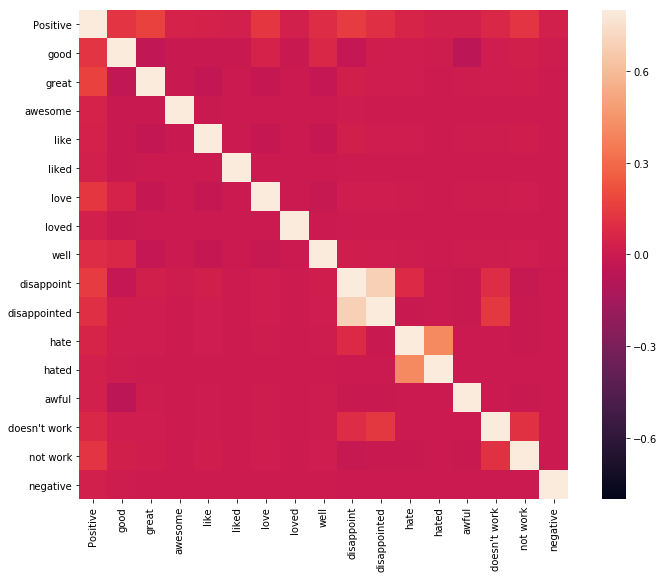

In [92]:
fcorr = features.corr()
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(fcorr, vmax=.8, vmin=-0.8, square=True)
plt.show()

In [99]:
data = features[keywords_pos + keywords_neg]
target = features['Positive']

In [102]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
#bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.fit(data, target).predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],(target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 406
